# Metadata

```
Course:   DS 5001
Module:   12 Lab
Topic:    Running the Syuzhet Package in R
Author:   R.C. Alvarado

Purpose:  Use Jockers' [Syuzhet module](https://rdrr.io/cran/syuzhet/) in R.
```

To use R in Jupyter, see https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/

## Set Up

In [1]:
install.packages('syuzhet')
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/14/rnyfspnx2q131jp_752t9fc80000gn/T//RtmpwrHvM6/downloaded_packages


also installing the dependencies ‘lifecycle’, ‘rlang’





The downloaded binary packages are in
	/var/folders/14/rnyfspnx2q131jp_752t9fc80000gn/T//RtmpwrHvM6/downloaded_packages


### Configuration

In [2]:
# methods = c("syuzhet", "afinn", "bing", "nrc", "stanford")
# Try bing or syuzhet
method = 'nrc'
fft_low_pass = 3
dct_low_pass = 5

### Libraries

In [3]:
library(syuzhet)
library(repr)

In [4]:
options(repr.plot.width=15, repr.plot.height=6)

## Define Main Function

In [5]:
plotitall <- function (book_file, book_title) {

    # Get the book and compute sentiment
    book <- get_text_as_string(book_file)
    book.s_v <- get_sentences(book)
    book.sentiment_vector <- get_sentiment(book.s_v, method=method)
    
    # Plot the raw signal
    plot(book.sentiment_vector, 
         type ="l", 
         main = book_title,
         xlab = "Narrative Time", 
         ylab = "Emotional Valence")
    
    # Get smoothed signal the old way
    book.ft_values <- get_transformed_values(book.sentiment_vector, 
                                     low_pass_size = fft_low_pass, 
                                     x_reverse_len = 100,
                                     scale_vals = TRUE, 
                                     scale_range = FALSE)
    
    # Get smoothing signal the new way
    book.dct_values <- get_dct_transform(book.sentiment_vector, 
                                         scale_vals = TRUE, 
                                         scale_range = FALSE)
    
    # Plot the old 
    plot(book.ft_values,
         type ="h", 
         main = paste(book_title, " transformed (FFT)"), 
         xlab = "narrative time", 
         ylab = "Emotional Valence", col = "red")
    
    # Plot the new
    plot(book.dct_values,
         type ="h", 
         main = paste(book_title, " transformed (DCT)"), 
         xlab = "narrative time", 
         ylab = "Emotional Valence", col = "red")
    
}

## Explore

### Frankenstein

In [10]:
# plotitall('data_in//syuzhet//frankenstein.txt', "Frankenstein")

### Persuasion

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


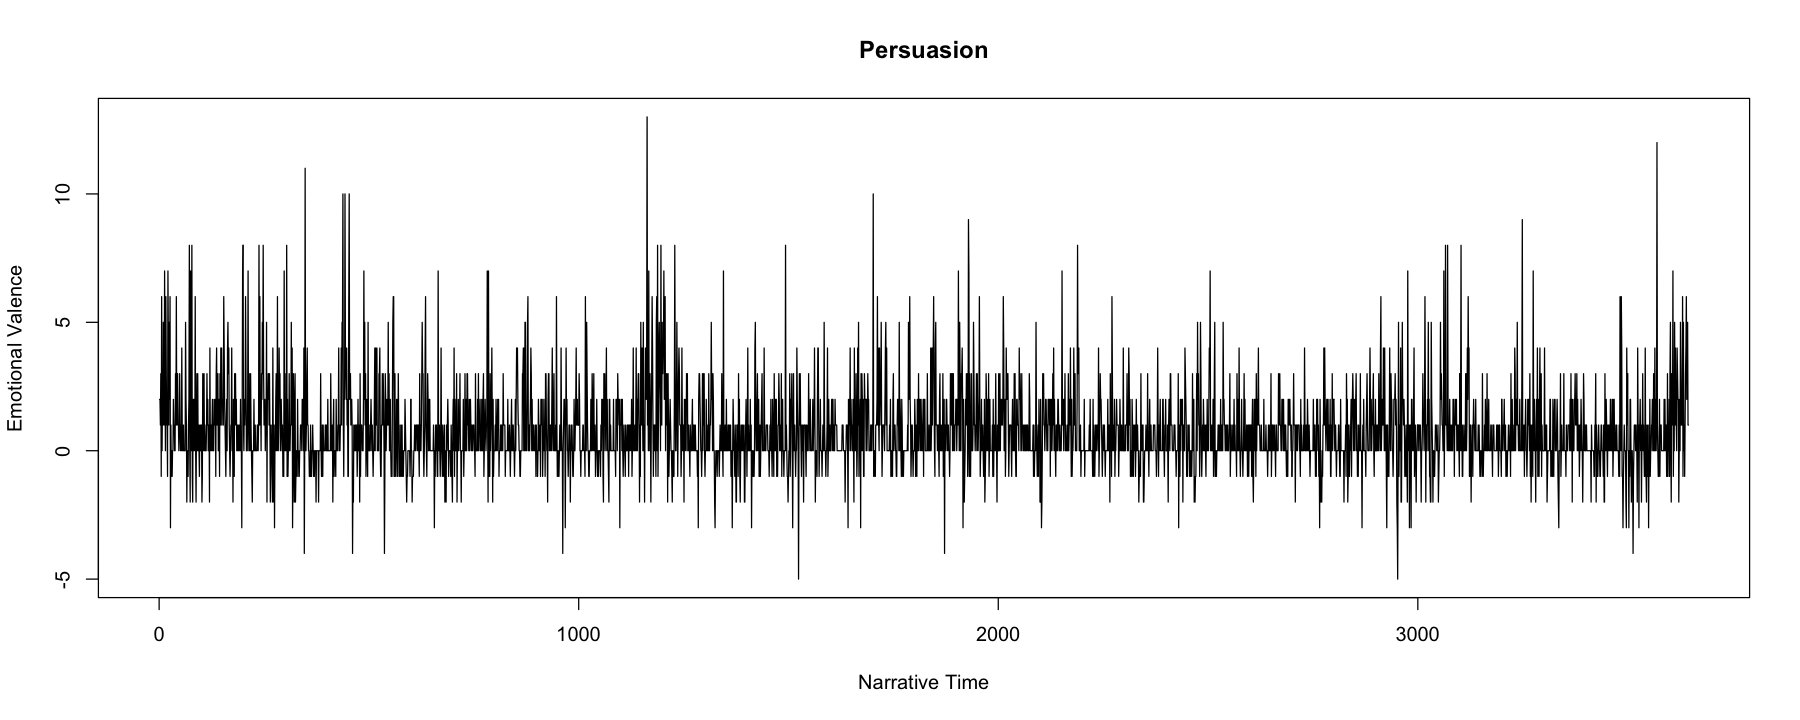

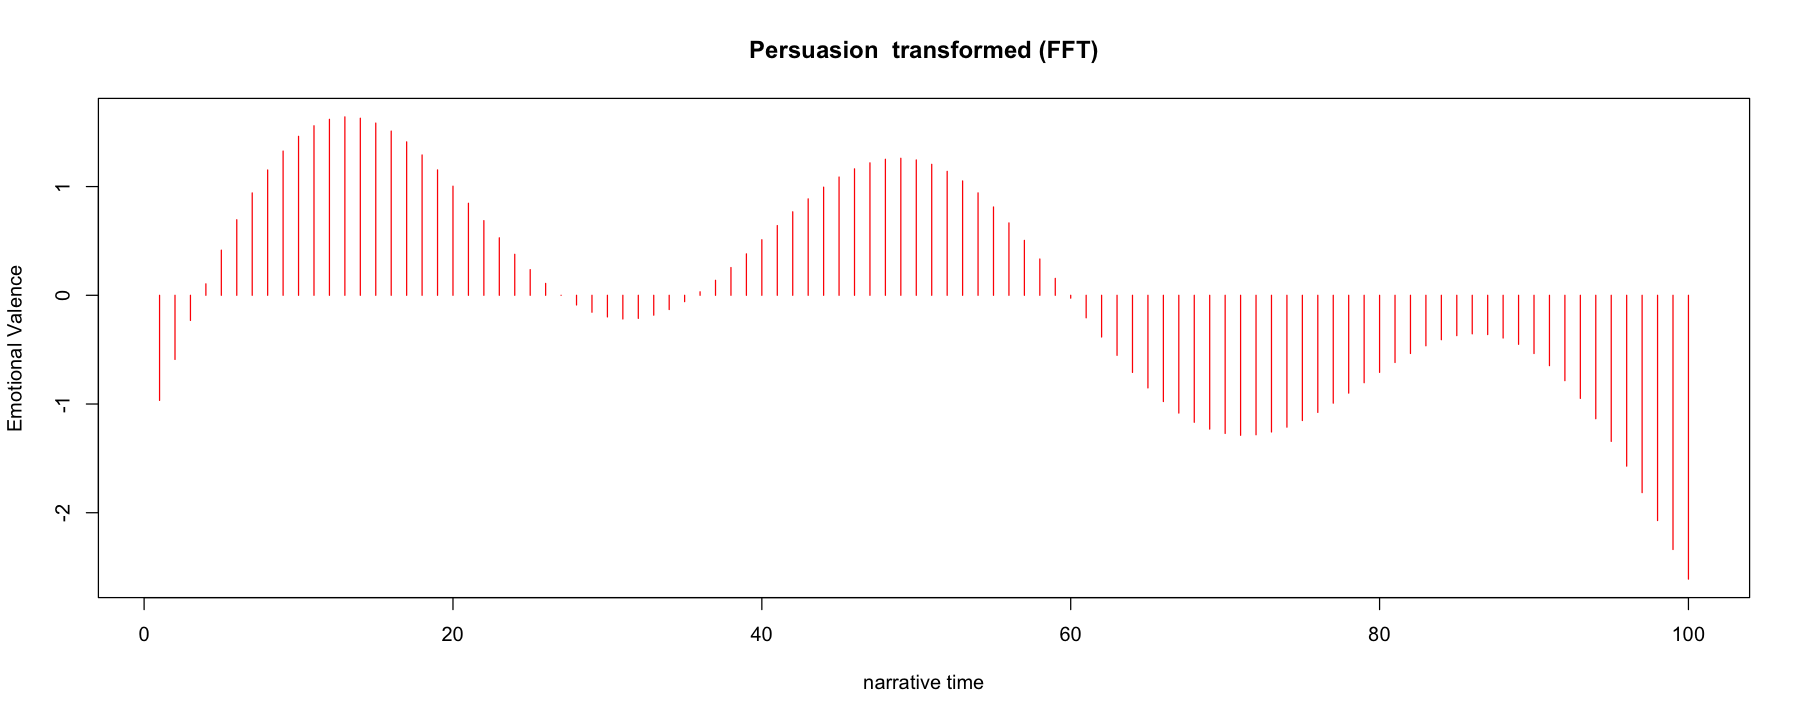

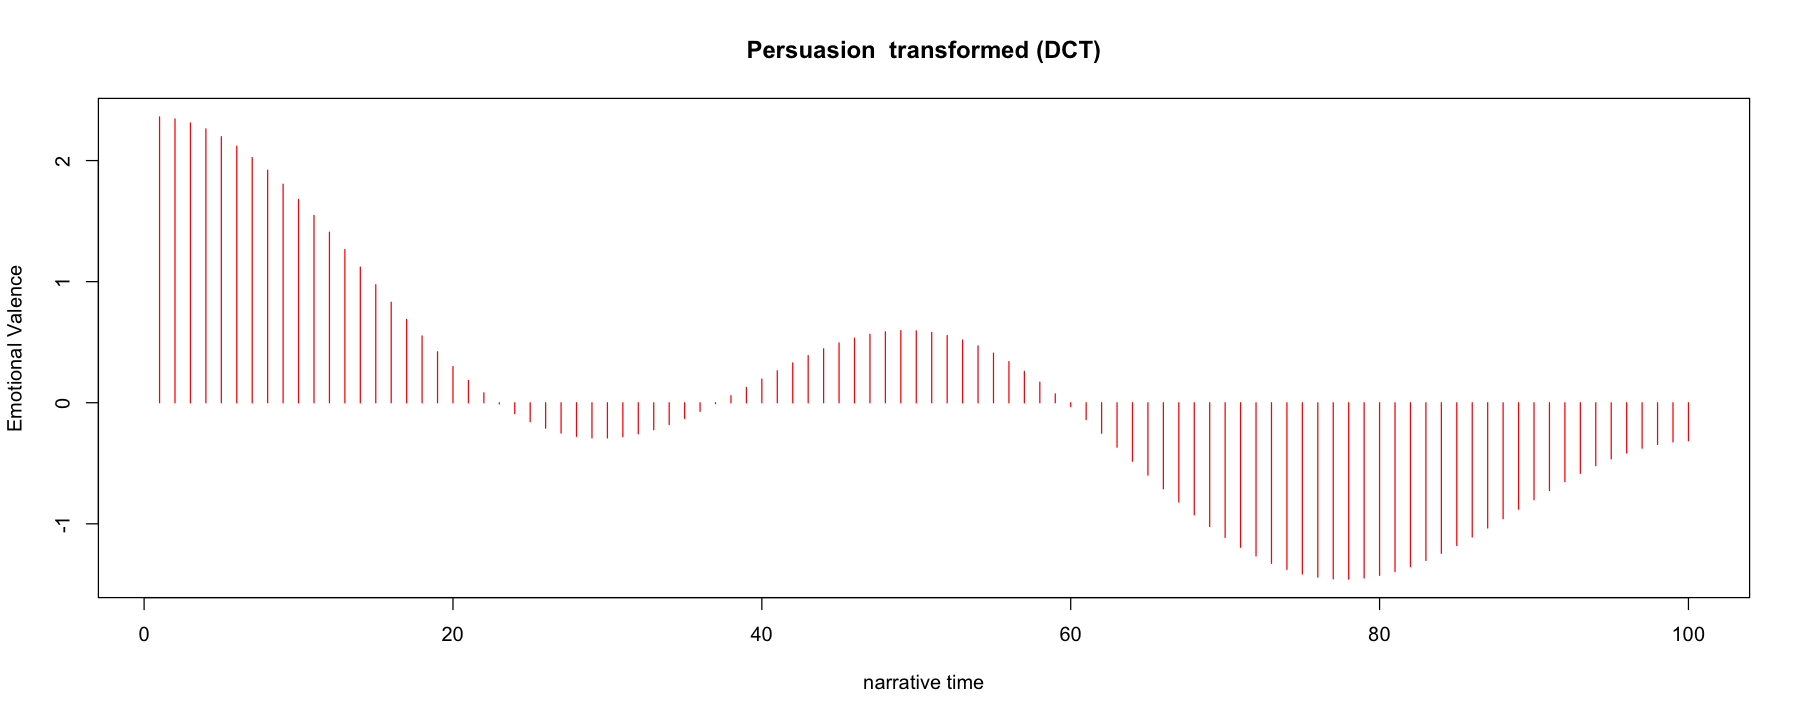

In [7]:
plotitall('data_in//syuzhet//persuasion.txt', 'Persuasion')

### Moby Dick

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


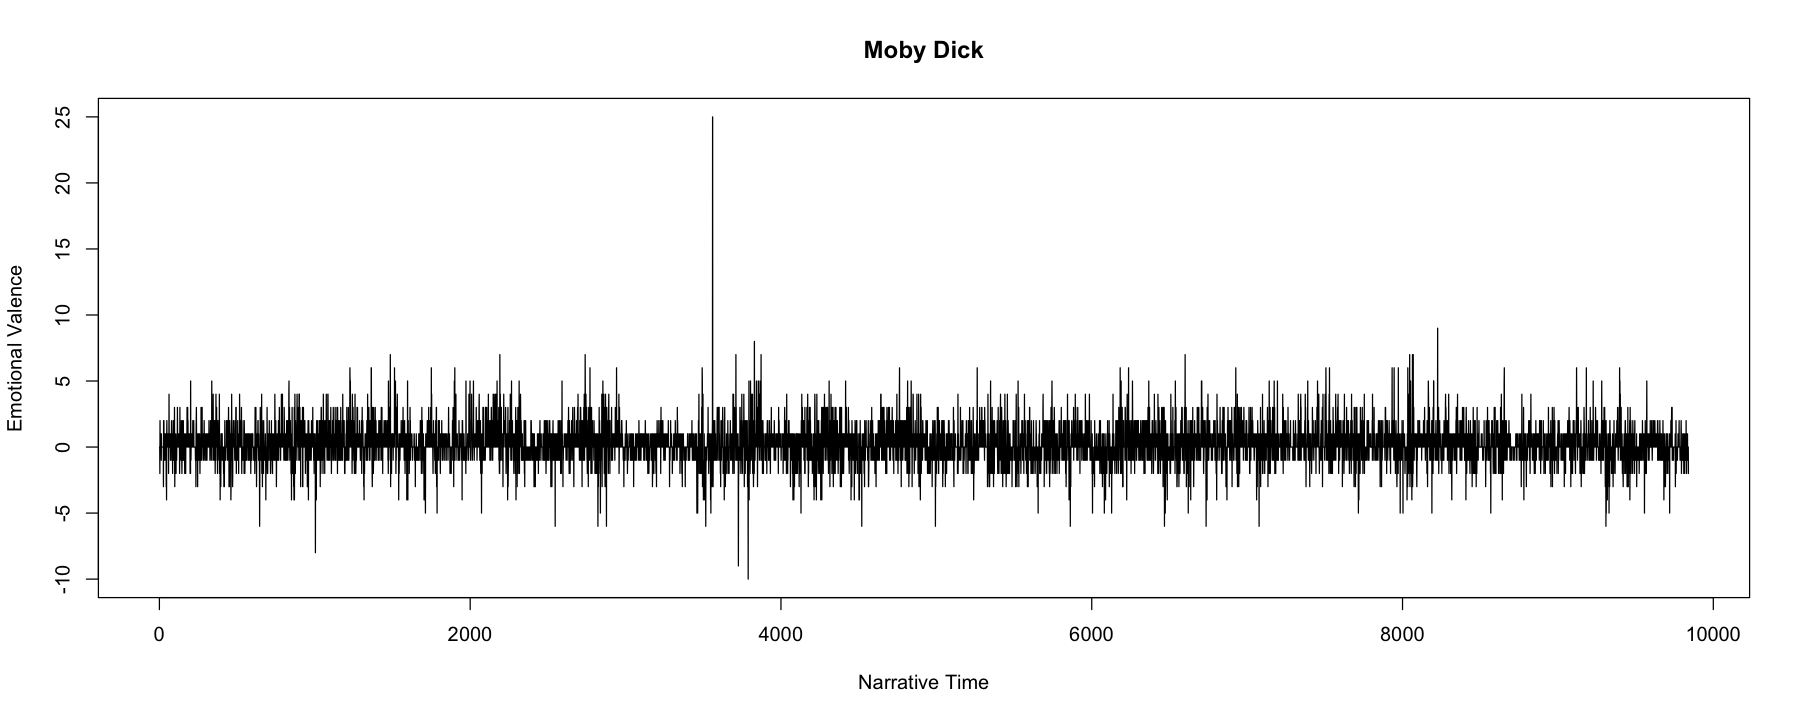

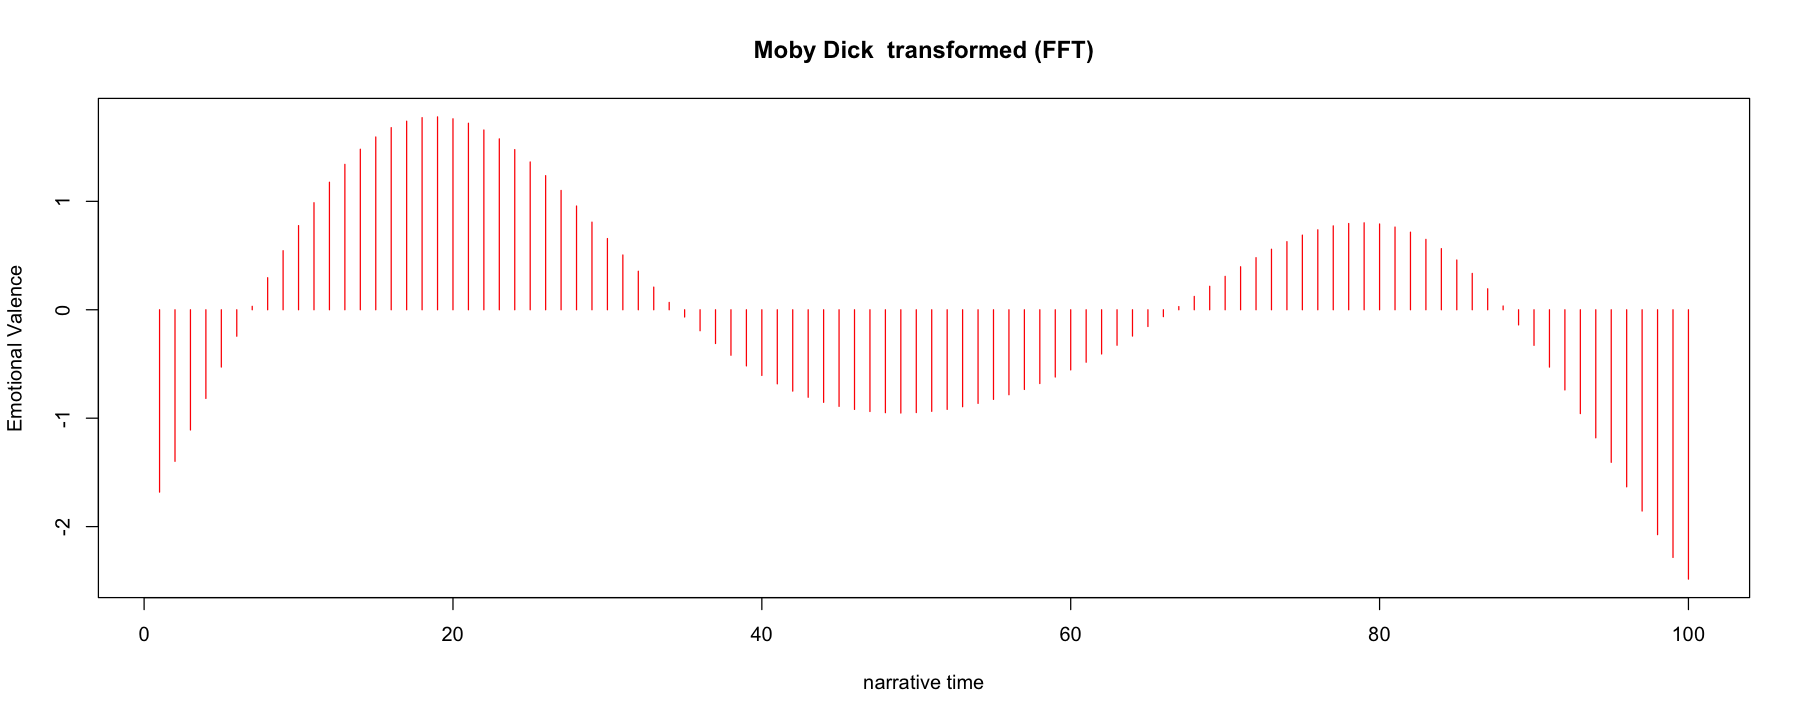

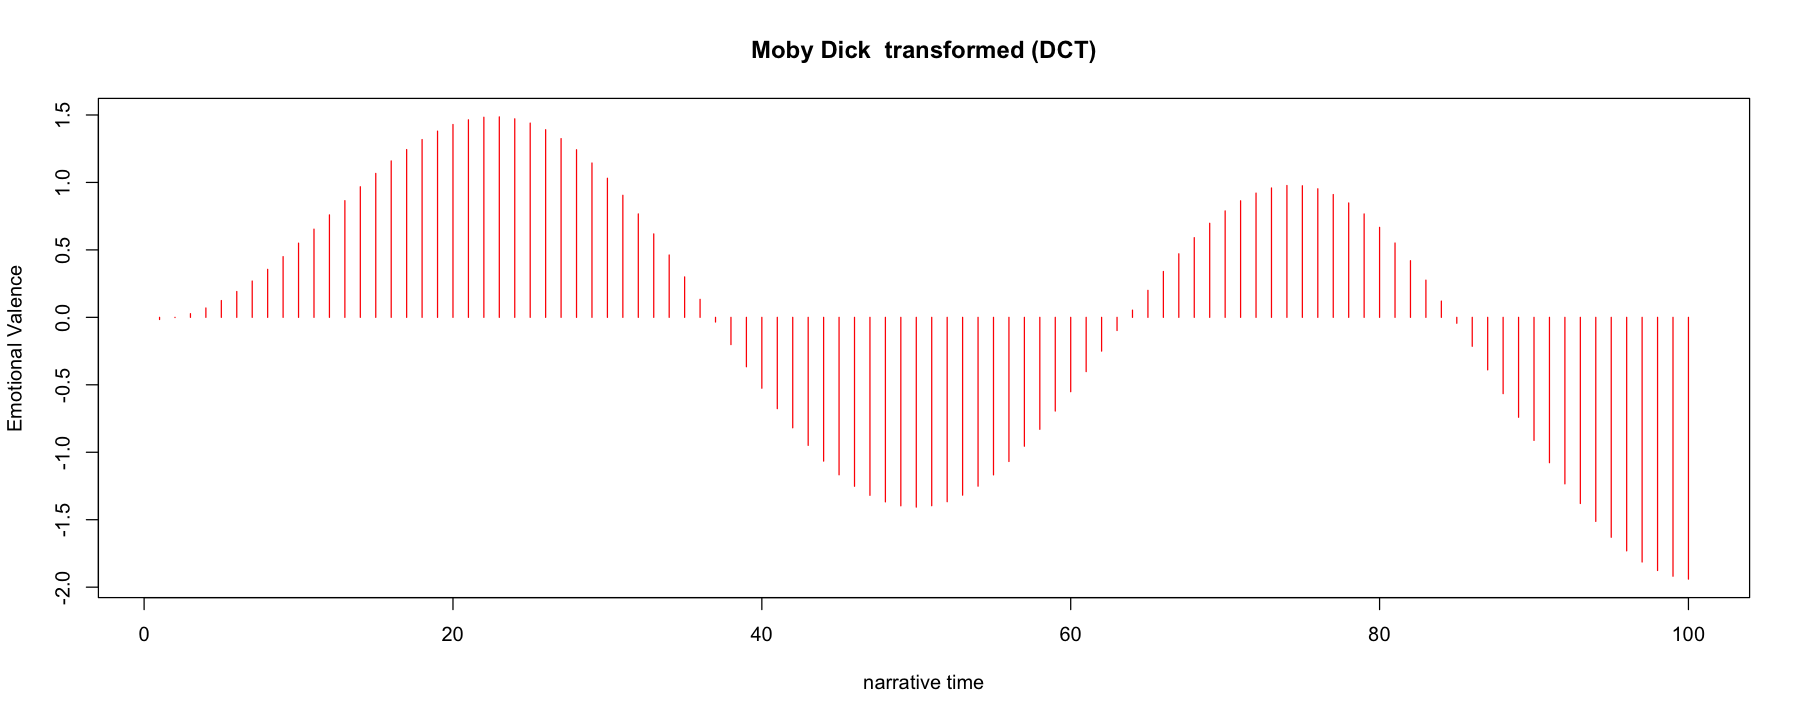

In [8]:
plotitall('data_in//syuzhet//moby.txt', 'Moby Dick')

### Dracula

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


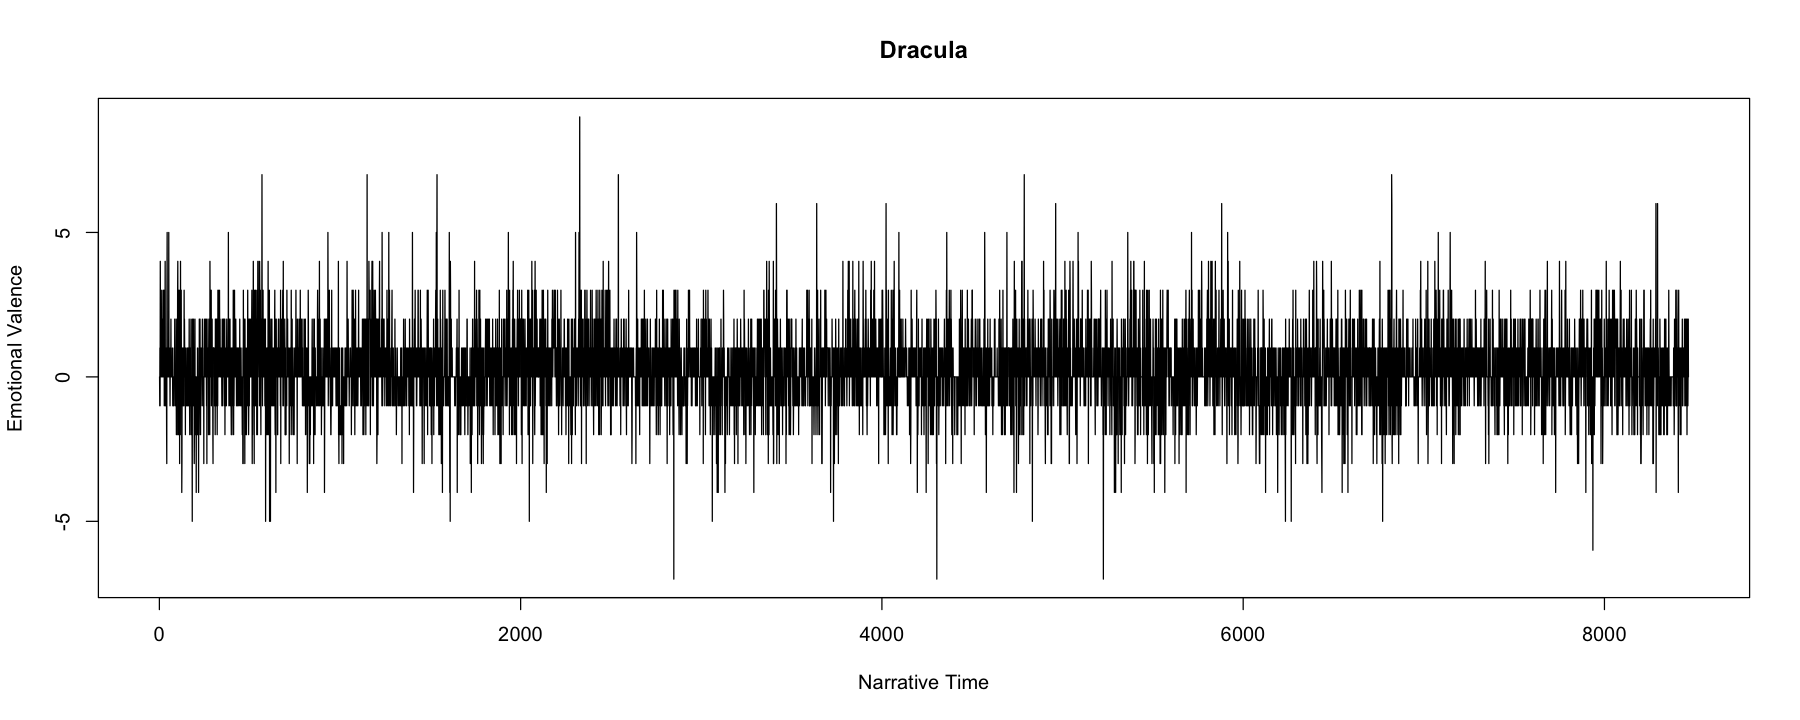

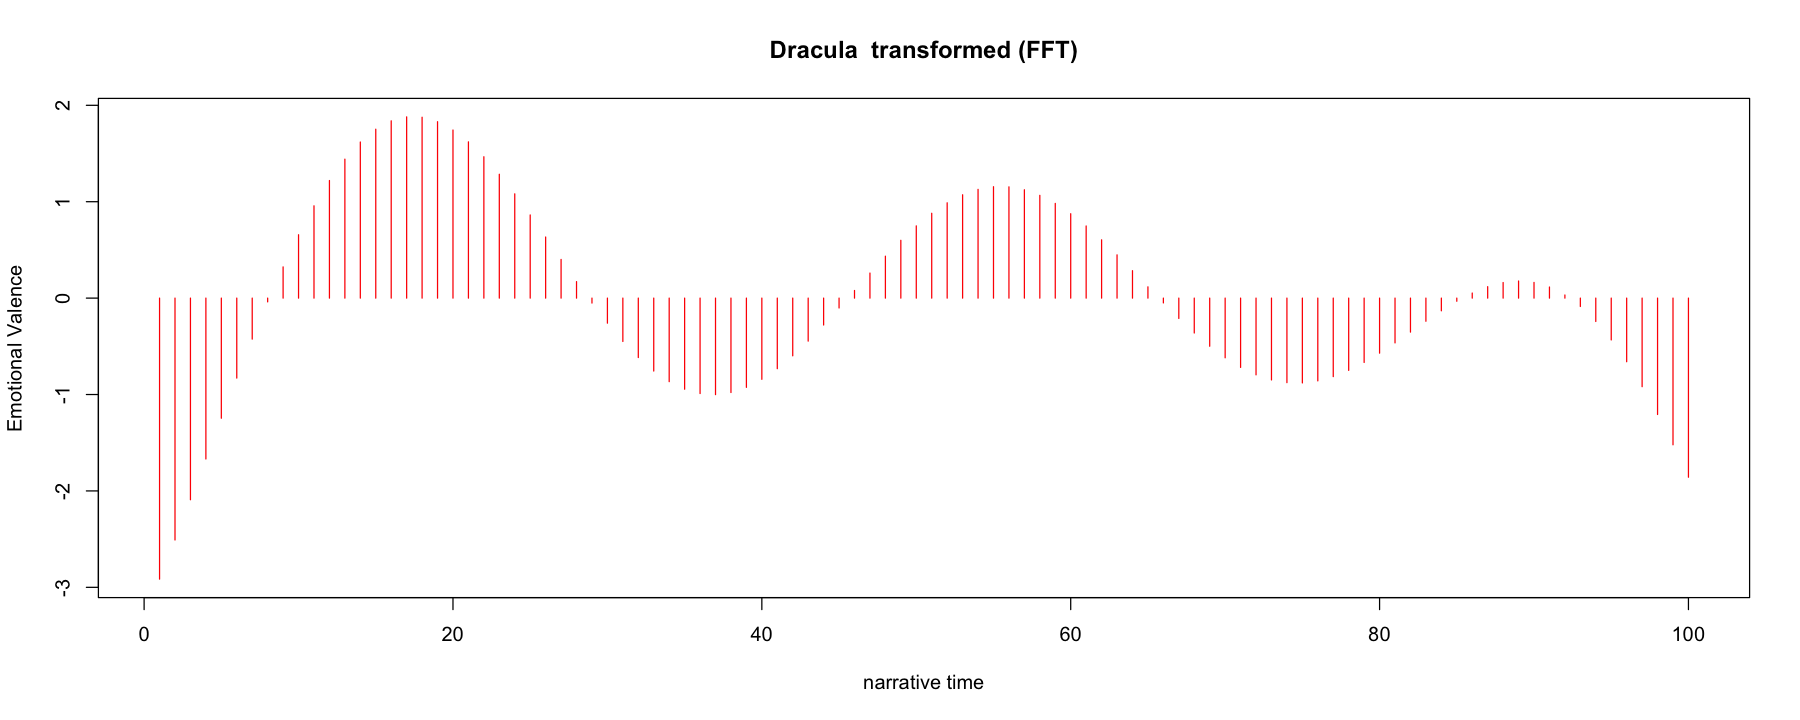

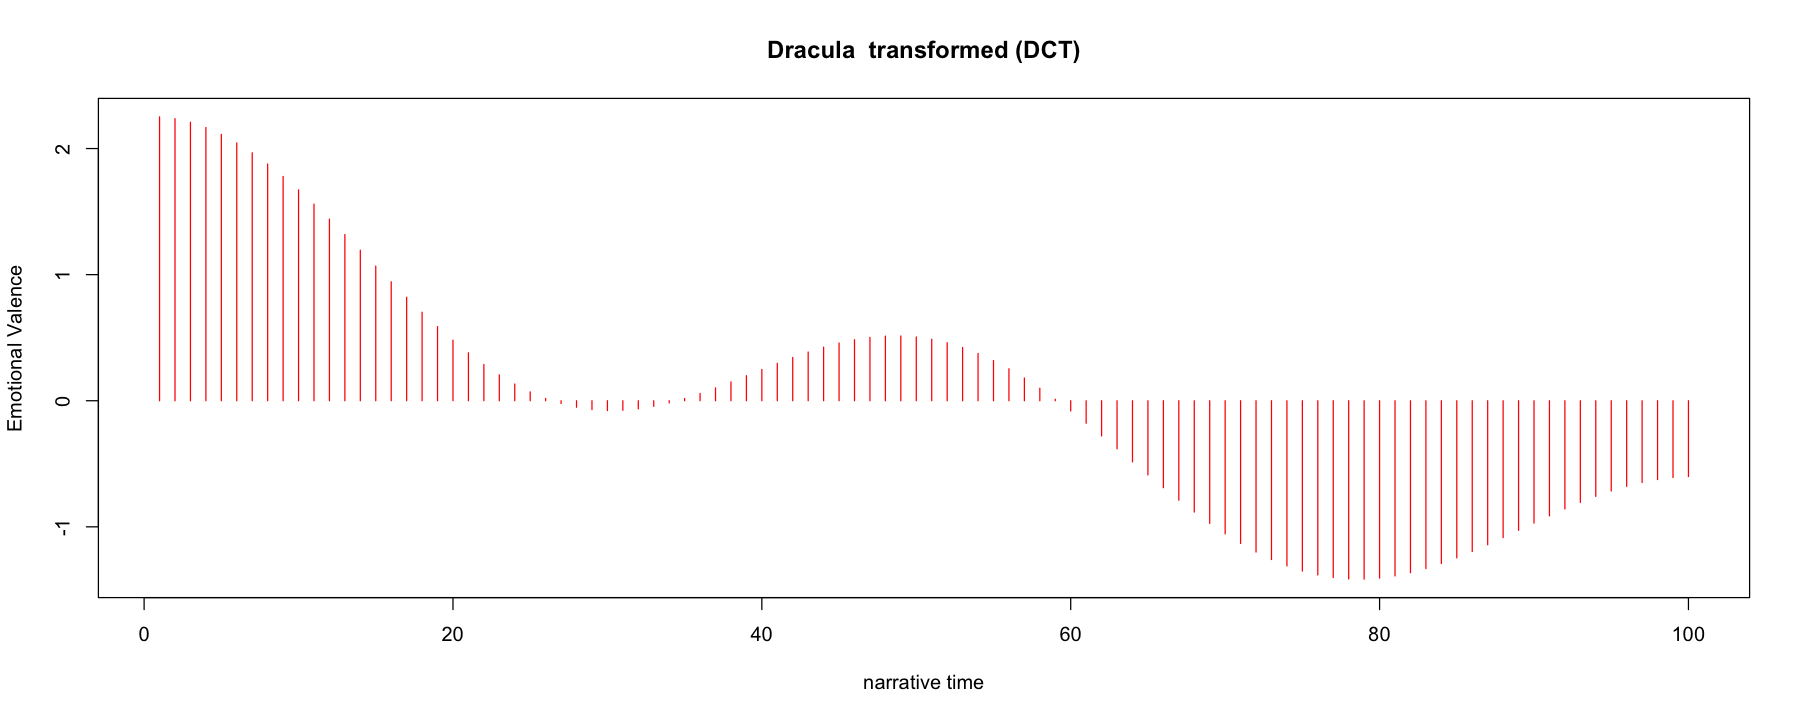

In [9]:
plotitall('data_in//syuzhet/dracula.txt', 'Dracula')